# Proyek Machine Learning: Klasifikasi Risiko Diabetes

Dataset: Pima Indians Diabetes
Sumber: [Kaggle - Pima Indians Diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
Jumlah Sampel: 768
Jumlah Fitur: 8 fitur + 1 label (Outcome)


## 1. Domain dan Business Understanding

**Latar Belakang:**
Penyakit diabetes merupakan salah satu penyebab utama kematian global. Deteksi dini penting untuk mencegah komplikasi.

**Problem Statement:** Dapatkah kita memprediksi apakah seseorang memiliki risiko diabetes?

**Goals:** Membangun model klasifikasi dengan akurasi tinggi.

**Solution Statement:**
- Logistic Regression (baseline)
- Random Forest + tuning
- XGBoost sebagai kandidat utama


## 2. Data Understanding

Menggunakan dataset dari Pima Indians Diabetes.
- Fitur: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
- Label: Outcome (1: diabetes, 0: tidak)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


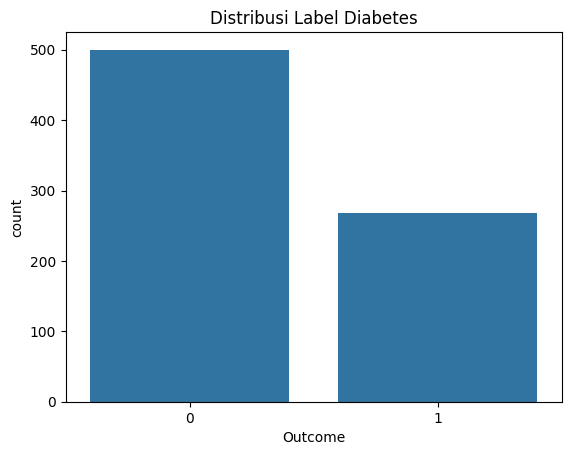

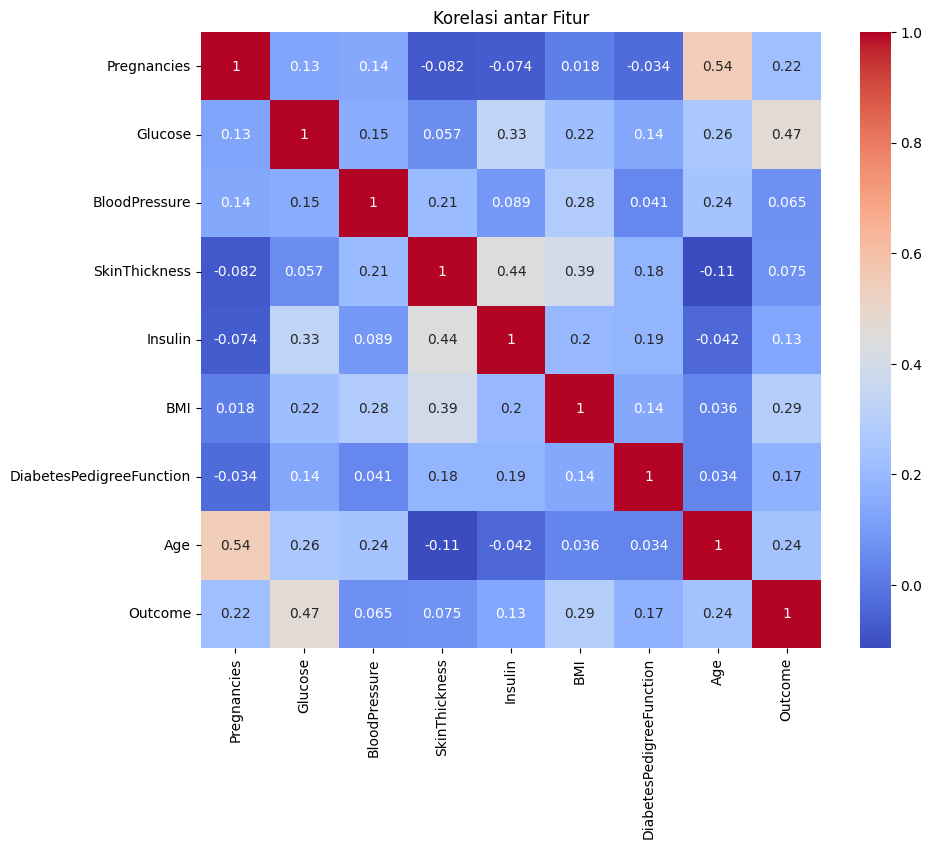

Glucose memiliki 5 nilai nol.
BloodPressure memiliki 35 nilai nol.
SkinThickness memiliki 227 nilai nol.
Insulin memiliki 374 nilai nol.
BMI memiliki 11 nilai nol.


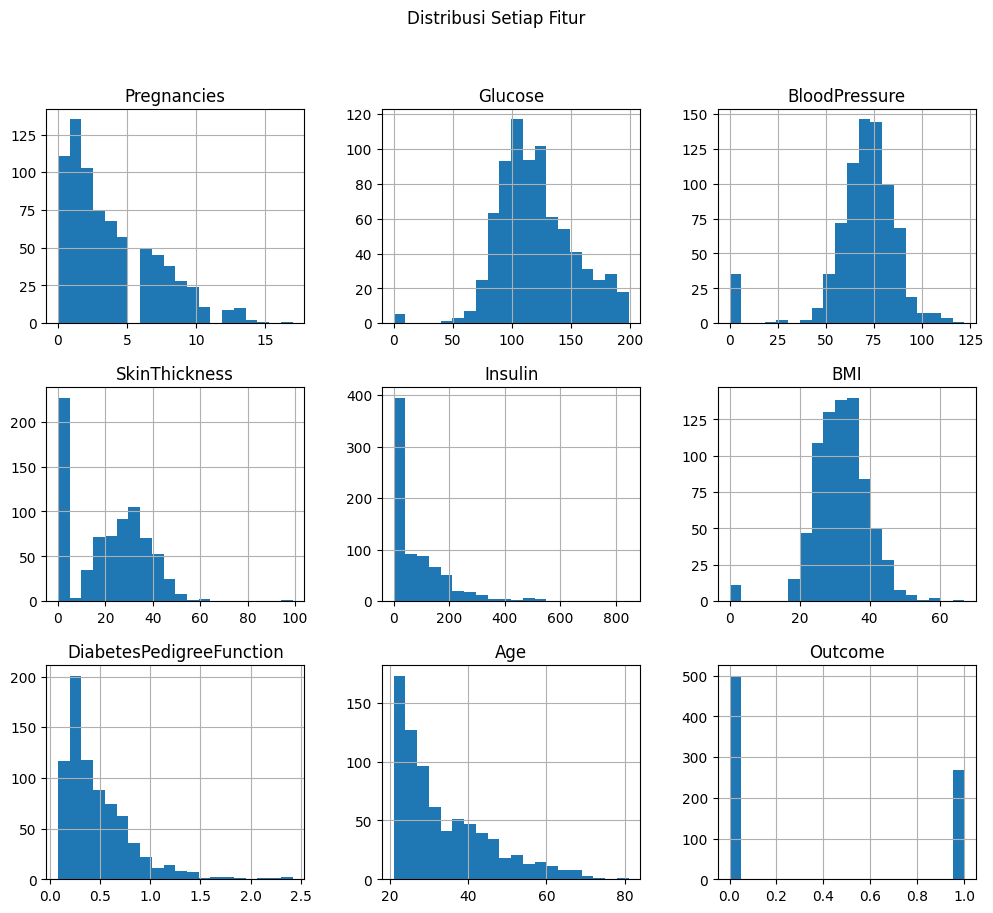

In [16]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Label Diabetes")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur")
plt.show()

zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    print(f"{col} memiliki {df[df[col] == 0].shape[0]} nilai nol.")

df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribusi Setiap Fitur")
plt.show()

## 3. Data Preparation
- Ganti nilai nol pada fitur tertentu dengan NaN
- Imputasi dengan median
- Normalisasi data
- Train-test split


In [17]:
# Identifikasi kolom dengan nilai nol yang tidak logis
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Ganti nilai nol dengan median
df.fillna(df.median(), inplace=True)

# Pisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    print(f"{col} memiliki {df[df[col] == 0].shape[0]} nilai nol.")

Glucose memiliki 0 nilai nol.
BloodPressure memiliki 0 nilai nol.
SkinThickness memiliki 0 nilai nol.
Insulin memiliki 0 nilai nol.
BMI memiliki 0 nilai nol.


## 4. Modeling
- Logistic Regression
- Random Forest
- XGBoost
- Bandingkan performa dengan accuracy dan F1-Score


In [4]:
# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Latih model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Evaluasi dan tampilkan hasil
for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test_scaled)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:05:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
[[82 17]
 [21 34]]

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
[[78 21]
 [20 35]]

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59     

In [9]:
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train_scaled, y_train)

print("Best Logistic Regression:", log_reg_grid.best_params_)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_scaled, y_train)

print("Best Random Forest:", rf_grid.best_params_)

# Parameter grid untuk XGBoost
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1.0]
}

# GridSearchCV untuk XGBoost
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        xgb_params,
                        cv=5,
                        scoring='accuracy')

# Fit ke data training
xgb_grid.fit(X_train_scaled, y_train)

# Tampilkan parameter terbaik
print("Best XGBoost:", xgb_grid.best_params_)

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)

print("Best SVM:", svm_grid.best_params_)

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

print("Best KNN:", knn_grid.best_params_)


Best Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:15:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [10]:
# Inisialisasi model dengan parameter terbaik hasil tuning
models = {
    'Logistic Regression': LogisticRegression(C=1, solver='liblinear', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42),
    'XGBoost': XGBClassifier(
        learning_rate=0.1,
        max_depth=3,
        n_estimators=50,
        subsample=1.0,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    'SVM': SVC(C=1, gamma='scale', kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='manhattan')
}

# Latih model dengan parameter tuning
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Evaluasi dan tampilkan hasil
for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test_scaled)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:20:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
[[82 17]
 [21 34]]

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
[[78 21]
 [20 35]]

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65     

## 5. Evaluation
- Metrik evaluasi: Accuracy, Precision, Recall, F1-Score
- XGBoost memiliki keseimbangan terbaik dan F1 tertinggi
